
# Picture notebook!

In [1]:
using Plots
using DelimitedFiles

## Model Selection

In [71]:
try_max = 3
T = 40
AUSI = zeros(try_max,T)
AUSEIR = zeros(try_max,T)
distance = zeros(try_max,T)

for trial in 1:try_max
    AUSI[trial,:] = readdlm("./ModelSelection/try$(trial)_AUcauSI.txt")
    AUSEIR[trial,:] = readdlm("./ModelSelection/try$(trial)_AUcauSEIR.txt")
    distance[trial,:] = readdlm("./ModelSelection/try$(trial)_distance.txt")
end

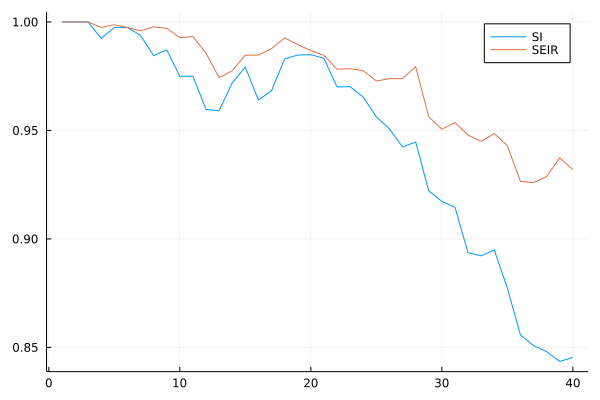

In [72]:
trial = 3
plot(AUSI[trial,:], label = "SI")
plot!(AUSEIR[trial,:], label = "SEIR")

In [89]:
SIErr=[err(AUSI[:,t]) for t in 1:T]
SEIRErr=[err(AUSEIR[:,t]) for t in 1:T]
distErr = [err(distance[:,t]) for t in 1:T]

40-element Vector{Float64}:
 0.0004157706173512372
 0.0004999619845369916
 0.0006688667273232366
 0.0009955299924097815
 0.0013790496802676586
 0.0017526612954986084
 0.002137025873003354
 0.002497534432873579
 0.0027612400991440006
 0.0028408956709837668
 0.0027733232708719697
 0.002513168985941481
 0.002139092731626826
 ⋮
 0.007158152412224876
 0.007539868953576097
 0.00786841581240668
 0.008108662758284778
 0.008306589266986871
 0.008471052486184918
 0.008595144638989995
 0.008674687640490097
 0.008701898713023081
 0.008683106112781091
 0.008587822738815209
 0.008445526265470748

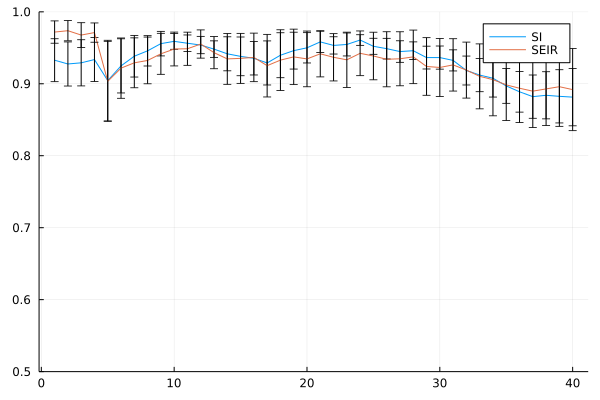

In [86]:
plot(avg(AUSI)', yerror=SIErr, label="SI")
plot!(avg(AUSEIR)',yerror=SEIRErr, label="SEIR")
ylims!(0.5,1)

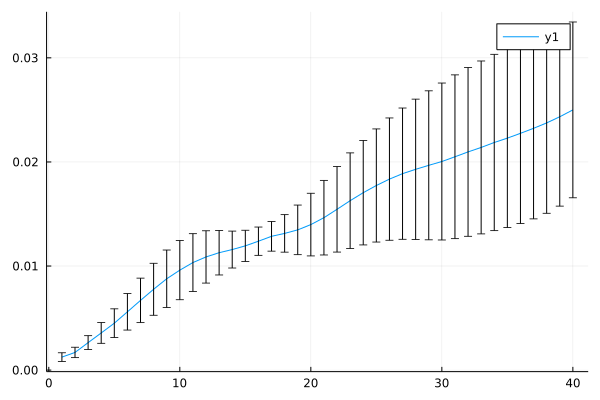

In [92]:
plot(avg(distance)', yerror = distErr)

## Real Graph Inference (Hospitals)

In [40]:
try_max = 3
nobs_set = [10, 40, 80, 200, 300, 800]
T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("./RealGraph/RealGraphData2/try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("./RealGraph/RealGraphData2/try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("./RealGraph/RealGraphData2/try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("./RealGraph/RealGraphData2/try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("./RealGraph/RealGraphData2/try$(trial)nobs$(nobs)mc.txt")
    end
end

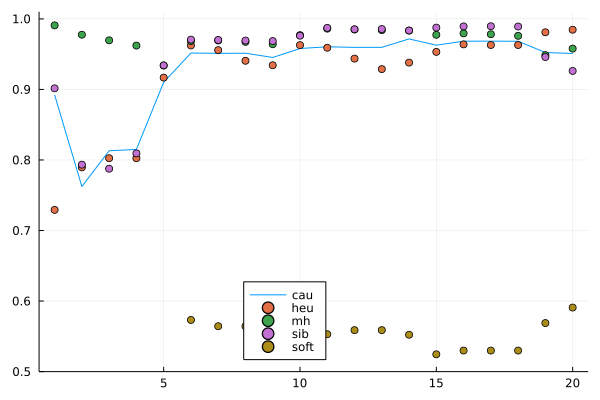

In [58]:
tr, obs = 2,6
plot(AUcau[tr,obs,:],label="cau")
scatter!(AUheu[tr,obs,:],label="heu")
scatter!(AUmh[tr,obs,:],label="mh")
scatter!(AUsib[tr,obs,:],label="sib")
scatter!(AUsoft[tr,obs,:],label="soft", legend = :bottom)

ylims!(0.5,1.01)

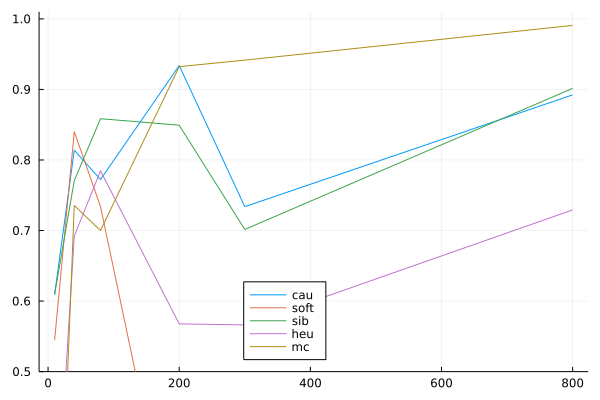

In [57]:
tr, time = 2 , 1
plot(nobs_set,AUcau[tr,:,time],label="cau", legend=:bottom)
plot!(nobs_set,AUsoft[tr,:,time], label="soft")
plot!(nobs_set,AUsib[tr,:,time], label = "sib")
plot!(nobs_set,AUheu[tr,:,time], label = "heu")
plot!(nobs_set,AUmh[tr,:,time], label = "mc")
#savefig("../provaSoft")
ylims!(0.5,1.01)

In [44]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

err (generic function with 1 method)

In [45]:
err(AUcau[:,1,1])

0.1055216031382295

In [46]:
cauErr=[err(AUcau[:,r,end]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,end]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,end]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,end]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,end]) for r in 1:length(nobs_set)]

6-element Vector{Float64}:
 0.010130783136855897
 0.011084404341168553
 0.012964995204378622
 0.012736567837561458
 0.00878883450701777
 0.004292585492900456

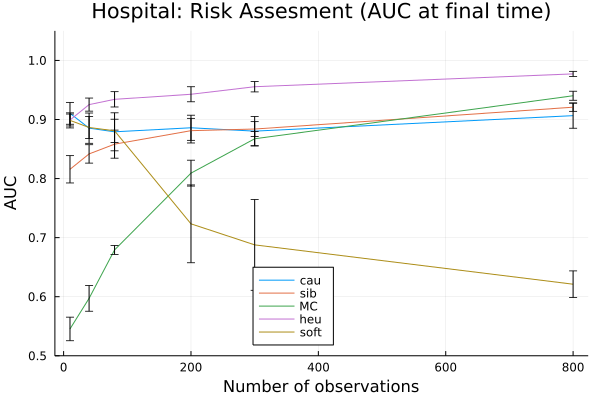

In [51]:
plot(nobs_set,avg(AUcau[:,:,end])',yerror=cauErr,label="cau",title="Hospital: Risk Assesment (AUC at final time)")
plot!(nobs_set,avg(AUsib[:,:,end])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set,avg(AUmh[:,:,end])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set,avg(AUheu[:,:,end])',yerror=heuErr,label="heu")
plot!(nobs_set,avg(AUsoft[:,:,end])',yerror=softErr,label="soft")
ylims!(0.5,1.05)
#savefig("./RealGraph/RealGraphPictures/RiskAssesment")

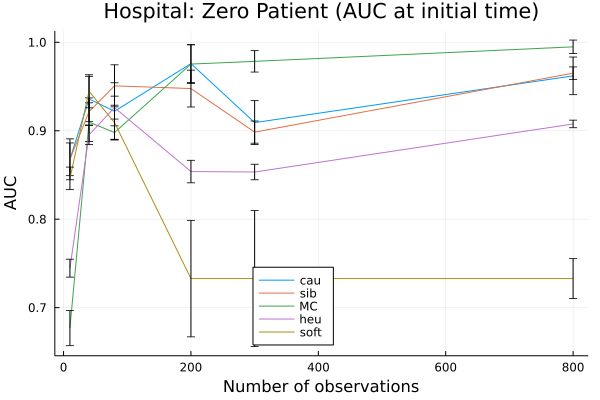

In [49]:
plot(nobs_set,avg(AUcau[:,:,1])',yerror=cauErr,label="cau",title="Hospital: Zero Patient (AUC at initial time)")
plot!(nobs_set,avg(AUsib[:,:,1])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set,avg(AUmh[:,:,1])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set,avg(AUheu[:,:,1])',yerror=heuErr,label="heu")
plot!(nobs_set,avg(AUsoft[:,:,1])',yerror=softErr,label="soft")

#savefig("./RealGraph/RealGraphPictures/ZeroPatient")

## Hyperparameters Inference

In [20]:
d1=readdlm("./Hyperparams/descent.txt")
d2=readdlm("./Hyperparams/descent2.txt")
d3=readdlm("./Hyperparams/descent3.txt")
d4=readdlm("./Hyperparams/descent4.txt")
d5=readdlm("./Hyperparams/descent5.txt")
fe=readdlm("./Hyperparams/hyperparams.txt");

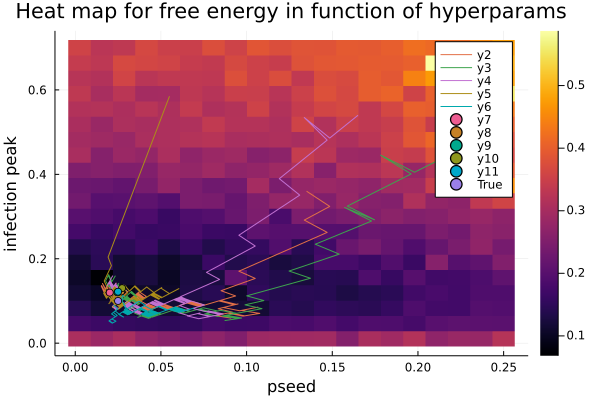

In [21]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(log.(log.(fe'))), xlabel="pseed", ylabel="infection peak",title="Heat map for free energy in function of hyperparams")
plot!(d1[:,1],d1[:,2])
plot!(d2[:,1],d2[:,2])
plot!(d3[:,1],d3[:,2])
plot!(d4[:,1],d4[:,2])
plot!(d5[:,1],d5[:,2])
scatter!([d1[end,1]],[d1[end,2]])
scatter!([d2[end,1]],[d2[end,2]])
scatter!([d3[end,1]],[d3[end,2]])
scatter!([d4[end,1]],[d4[end,2]])
scatter!([d5[end,1]],[d5[end,2]])
scatter!([1/40,],[0.1],label="True")
#savefig("Hyperdescent")    

## Hyperparams Comparison

In [22]:
fe_cau=readdlm("./Hyperparams/hyper_fe_cau.txt")
fe_soft=readdlm("./Hyperparams/hyper_fe_soft.txt");
fe_Ssoft=readdlm("./Hyperparams/hyper_fe_Ssoft.txt");

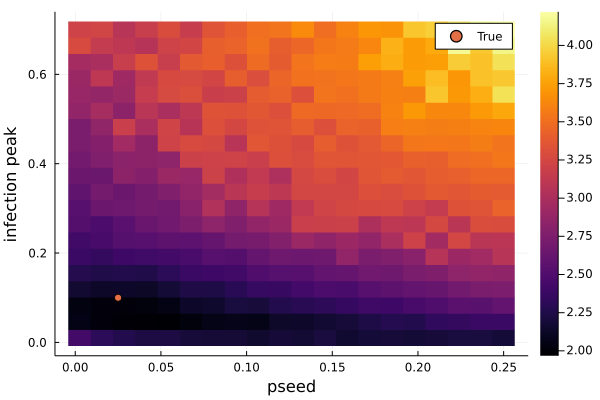

In [23]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_cau), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
#savefig("HyperCauF")

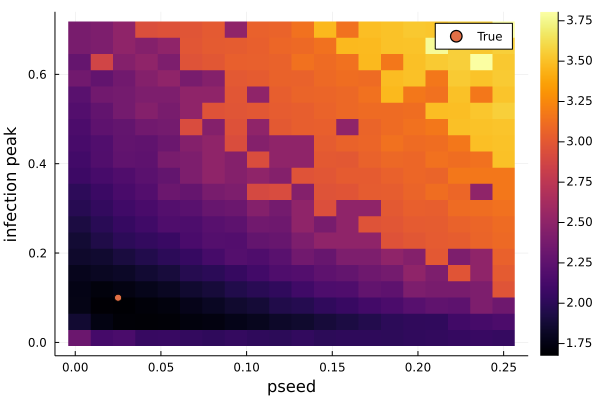

In [24]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_soft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
#savefig("HyperSoftF")

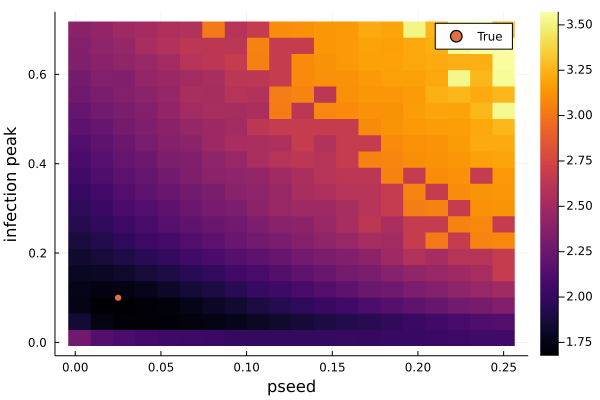

In [25]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_Ssoft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
#savefig("HyperSSoftF")